<a href="https://colab.research.google.com/github/arsalanyaghoobi/Complex_Image_Processing-and-Recognition/blob/master/Conv2D_Max_Flat_complex_pics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('loss')<0.05):
      print('loss is Far lower than what you think,I believe we had enough of this boring process')
      self.model.stop_training= True

In [ ]:
callbacks=myCallback()

In [ ]:
!wget --no-check-certificate \
  _TRAIN_URL = "https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip"


--2020-06-16 18:24:20--  http://_train_url/
Resolving _train_url (_train_url)... failed: Name or service not known.
wget: unable to resolve host address ‘_train_url’
--2020-06-16 18:24:20--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2020-06-16 18:24:20--  https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.134.128, 2607:f8b0:400c:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.134.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip.1’

horse-or-human.zip. 100%[===================>] 142.65M   142MB/s    in 1.0s    

2020-06-16 18:24:21 (142 MB/s) - ‘horse-or-human.zip.1’ saved [149574867/149574867]

FINISHED --2020-06-16 18:24:21--
Total wall clock time: 1.1s
Downloaded: 1 files, 143M in 1.0s (142 MB/s)


In [ ]:
!wget --no-check-certificate \
_TEST_URL = "https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip"

--2020-06-16 17:48:34--  http://_test_url/
Resolving _test_url (_test_url)... failed: Name or service not known.
wget: unable to resolve host address ‘_test_url’
--2020-06-16 17:48:34--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2020-06-16 17:48:34--  https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  47.4MB/s    in 0.2s    

2020-06-16 17:48:35 (47.4 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]

FINISHED --2020-06-16 17:48:35--
Total wall clock time: 0.5s
Downloaded: 1 files, 11M in 

In [ ]:
import os 
import zipfile 

local_zip='/content/horse-or-human.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/horse-or-human')
local_zip='/content/validation-horse-or-human.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/validation-horse-or-human')
zip_ref.close()

In [ ]:
train_horse_dir=os.path.join('/content/horse-or-human/horses')
train_human_dir=os.path.join('/content/horse-or-human/humans')
val_horse_dir=os.path.join('/content/validation-horse-or-human/horses')
val_human_dir=os.path.join('/content/validation-horse-or-human/humans')

In [ ]:
train_horse_name=os.listdir(train_horse_dir)
print(train_horse_name[:50])
train_human_name=os.listdir(train_human_dir)
print(train_human_name[:50])
val_horse_name=os.listdir(val_horse_dir)
print(val_horse_name[:50])
val_human_name=os.listdir(val_human_dir)
print(val_human_name[:50])

['horse19-1.png', 'horse27-4.png', 'horse50-2.png', 'horse26-1.png', 'horse20-1.png', 'horse01-7.png', 'horse37-4.png', 'horse08-7.png', 'horse45-9.png', 'horse05-8.png', 'horse31-4.png', 'horse17-3.png', 'horse49-2.png', 'horse20-6.png', 'horse43-7.png', 'horse10-0.png', 'horse12-7.png', 'horse43-2.png', 'horse27-6.png', 'horse04-1.png', 'horse34-7.png', 'horse26-8.png', 'horse18-0.png', 'horse12-3.png', 'horse01-4.png', 'horse19-2.png', 'horse13-6.png', 'horse01-5.png', 'horse13-8.png', 'horse15-6.png', 'horse05-6.png', 'horse22-6.png', 'horse49-9.png', 'horse23-5.png', 'horse14-0.png', 'horse41-7.png', 'horse44-2.png', 'horse38-3.png', 'horse34-3.png', 'horse23-8.png', 'horse35-0.png', 'horse25-2.png', 'horse43-9.png', 'horse26-2.png', 'horse13-9.png', 'horse49-4.png', 'horse46-8.png', 'horse24-2.png', 'horse31-6.png', 'horse20-7.png']
['human09-27.png', 'human14-17.png', 'human12-15.png', 'human08-12.png', 'human06-03.png', 'human05-21.png', 'human08-18.png', 'human08-03.png', 'hum

In [ ]:
print('total number of training horses:',len(os.listdir(train_horse_dir)))
print('total number of training humen:',len(os.listdir(train_human_dir)))
print('total number of validation horses:',len(os.listdir(val_horse_dir)))
print('total number of validation humen:',len(os.listdir(val_human_dir)))

total number of training horses: 500
total number of training humen: 527
total number of validation horses: 128
total number of validation humen: 128


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
nrows=4
ncols=4
pic_index=0

In [ ]:
fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)

<Figure size 1152x1152 with 0 Axes>

In [ ]:
pic_index +=8
next_horse_pix=[os.path.join(train_horse_dir,fname)
  for fname in train_horse_name[pic_index-8:pic_index]]
next_human_pix=[os.path.join(train_human_dir,fname)
  for fname in train_human_name[pic_index-8:pic_index]]

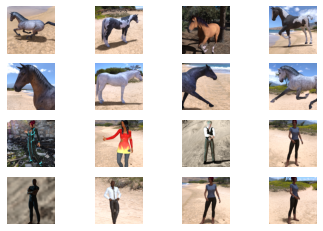

In [ ]:
for i, img_path in enumerate (next_horse_pix + next_human_pix):
  sp= plt.subplot(nrows,ncols,i+1)
  sp.axis('off')
  img= mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [ ]:
import tensorflow as tf

In [ ]:
model=tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(300,300,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(150,activation='relu'),
      tf.keras.layers.Dense(100,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid')
      ])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 147, 147, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 33, 33, 64)       

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255)
val_datagen=ImageDataGenerator(rescale=1/255)

train_generator=train_datagen.flow_from_directory(
    '/content/horse-or-human',
    target_size=(300,300),
    batch_size=100,
    class_mode='binary')
valid_generator=val_datagen.flow_from_directory(
    '/content/validation-horse-or-human',
    target_size=(300, 300),
    batch_size=20,
    class_mode='binary')


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
model.fit_generator(
    train_generator,
    steps_per_epoch=5,
    epochs=10,
    verbose=1,
    validation_data=valid_generator,
    validation_steps=8,
    callbacks=[callbacks])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
5/5 [==============================] - 98s 20s/step - loss: 0.8142 - acc: 0.4740 - val_loss: 0.6904 - val_acc: 0.4938
Epoch 2/10
5/5 [==============================] - 97s 19s/step - loss: 0.6878 - acc: 0.5199 - val_loss: 0.6649 - val_acc: 0.5250
Epoch 3/10
5/5 [==============================] - 99s 20s/step - loss: 0.7579 - acc: 0.5020 - val_loss: 0.6890 - val_acc: 0.5250
Epoch 4/10
5/5 [==============================] - 80s 16s/step - loss: 0.6857 - acc: 0.5597 - val_loss: 0.6880 - val_acc: 0.4875
Epoch 5/10
5/5 [==============================] - 97s 19s/step - loss: 0.6034 - acc: 0.7140 - val_loss: 1.1765 - val_acc: 0.5500
Epoch 6/10
5/5 [==============================] - 97s 19s/step - loss: 0.8304 - acc: 0.5660 - val_loss: 0.6506 - val_acc: 0.5188
Epoch 7/10
5/5 [==============================] - 81s 16s/step - loss: 0.6127 - acc: 0.7330 - val_loss: 0.8004 - val_acc: 0.5875
Epoch 8/10
5/5 [=====

In [ ]:
import numpy as np
from google.colab import files 
from keras.preprocessing import image
uploaded=files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  img=image.load_img(path,target_size=(300,300))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)  

Saving images.jpg to images.jpg


In [ ]:
images=np.vstack([x])
classes=model.predict(images,batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print(fn +  "the picture been shown is a human")
else:
    print(fn +  "the picture been shown is a horse")

[0.]
images.jpgthe picture been shown is a horse
